In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
books= pd.read_csv("Books.csv")
users=pd.read_csv("Users.csv")
ratings=pd.read_csv("Ratings.csv")

In [3]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [8]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [9]:

ratings.duplicated().sum()

0

In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
print(f"Unique Books: {books['ISBN'].nunique()}")
print(f"Year-Of-Publication Distribution:\n{books['Year-Of-Publication'].describe()}")
print(f"Top Publishers:\n{books['Publisher'].value_counts().head(10)}")
print(f"Top Authors:\n{books['Book-Author'].value_counts().head(10)}")

Unique Books: 271360
Year-Of-Publication Distribution:
count     271360
unique       202
top         2002
freq       13903
Name: Year-Of-Publication, dtype: int64
Top Publishers:
Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64
Top Authors:
Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


In [13]:
# Convert Year-Of-Publication to numeric, forcing errors to NaN
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')


### Outliers Detection

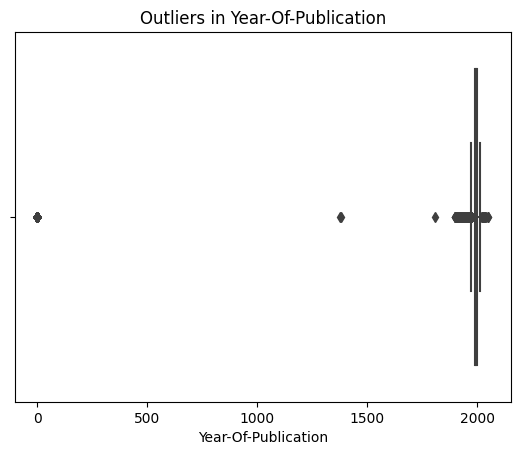

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=books['Year-Of-Publication'])
plt.title("Outliers in Year-Of-Publication")
plt.show()

In [15]:
print(f"Most Popular Books by ISBN:\n{books['ISBN'].value_counts().head(10)}")

Most Popular Books by ISBN:
ISBN
0195153448    1
0746008481    1
0395219906    1
043916169X    1
0879235322    1
077108482X    1
0207124310    1
0439172543    1
0590408518    1
0902375512    1
Name: count, dtype: int64


### Books by Year

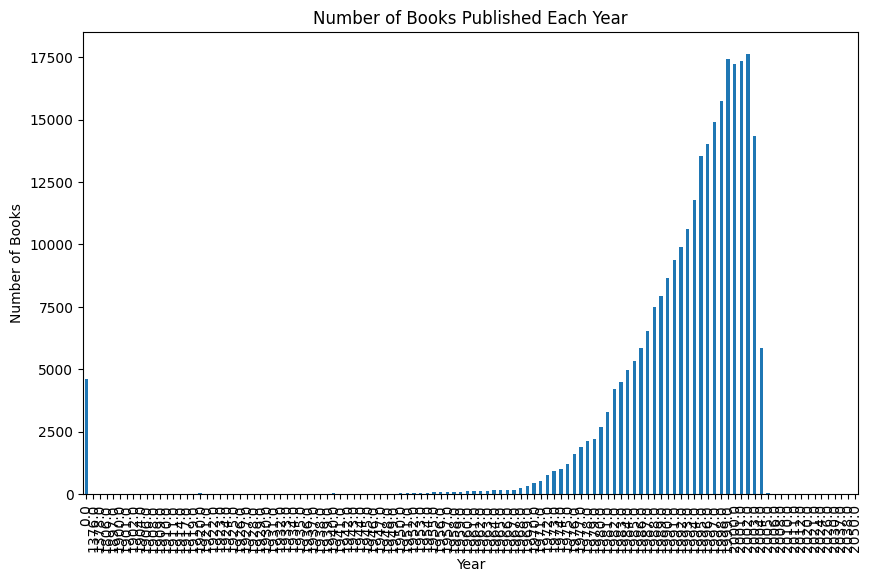

In [16]:
books['Year-Of-Publication'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title("Number of Books Published Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()

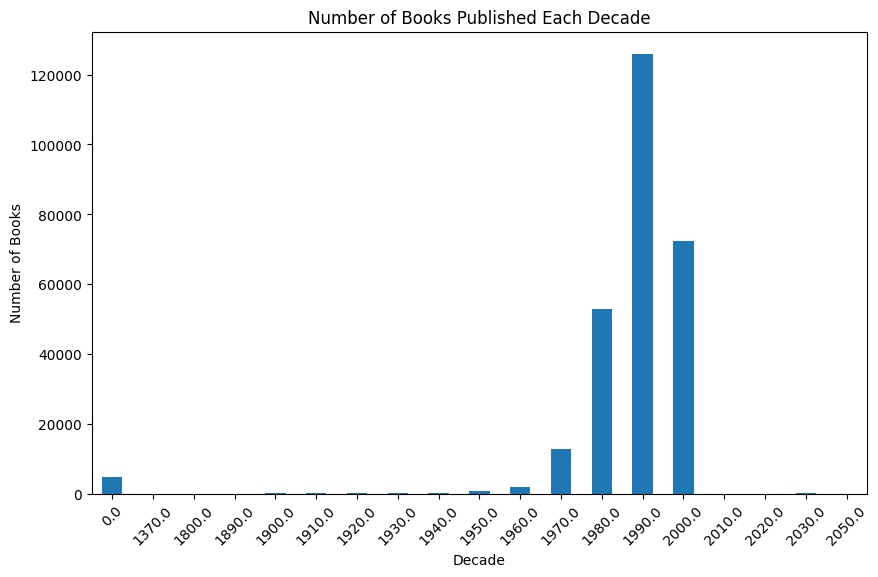

In [17]:
books['Decade'] = (books['Year-Of-Publication'] // 10) * 10
books['Decade'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title("Number of Books Published Each Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



### Books by Publisher

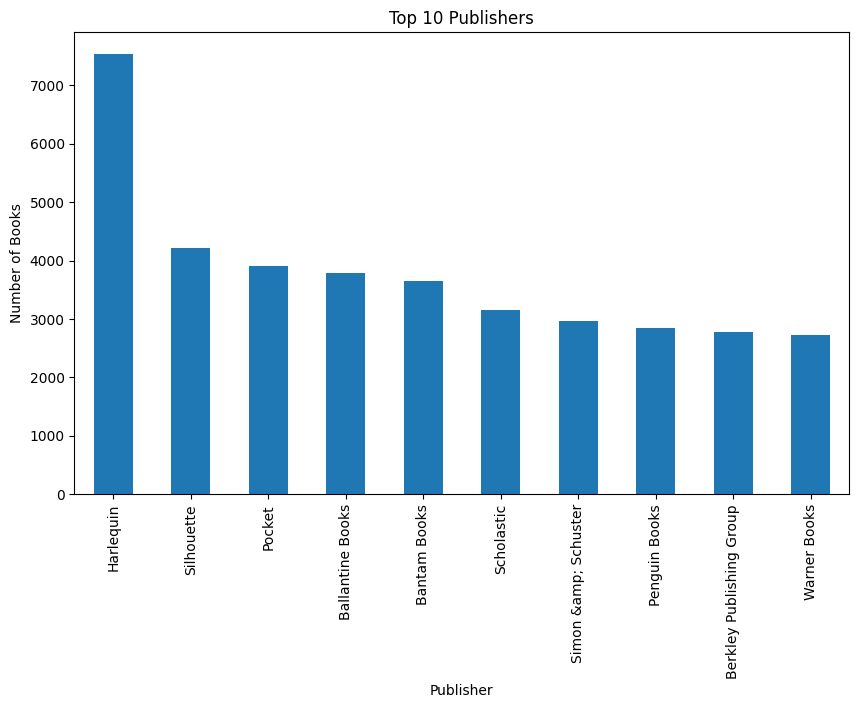

In [18]:
books['Publisher'].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.show()

### Books by Author

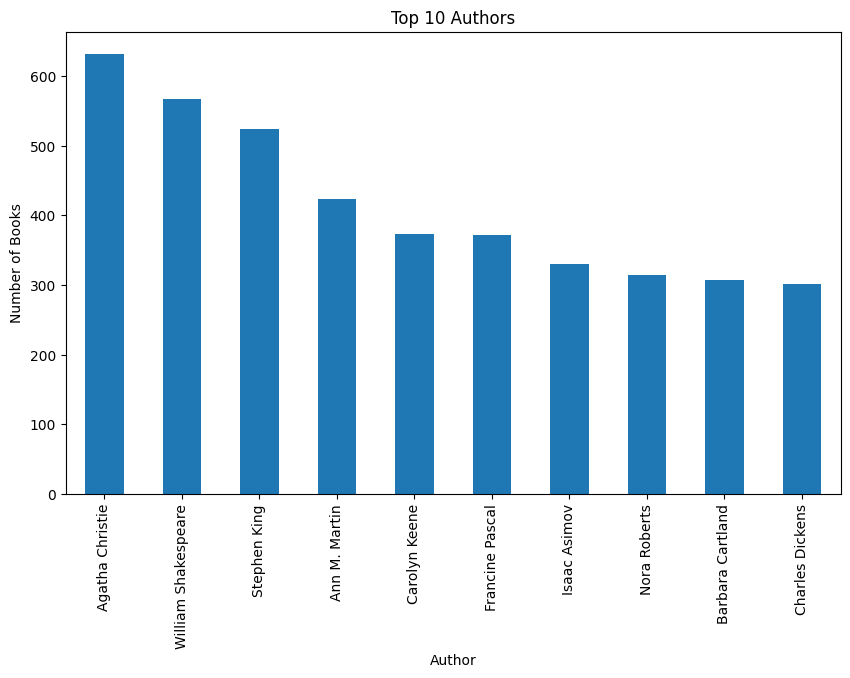

In [19]:
books['Book-Author'].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Authors")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.show()

## EDA on Users DataFrame:

### Demographic Analysis

In [20]:
print(f"Unique Locations: {users['Location'].nunique()}")
print(f"Age Distribution:\n{users['Age'].describe()}")

Unique Locations: 57339
Age Distribution:
count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64


### Age Outliers Detection

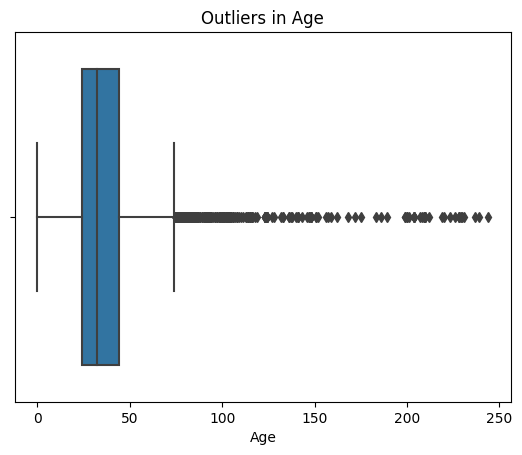

In [21]:
sns.boxplot(x=users['Age'])
plt.title("Outliers in Age")
plt.show()

###  Top Locations

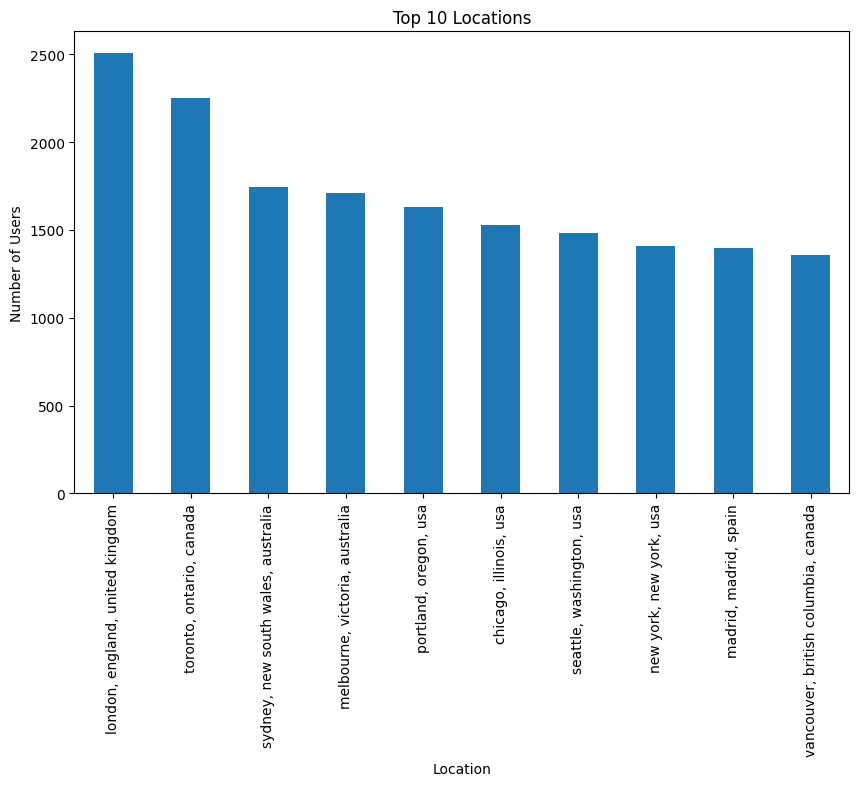

In [22]:
users['Location'].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.show()

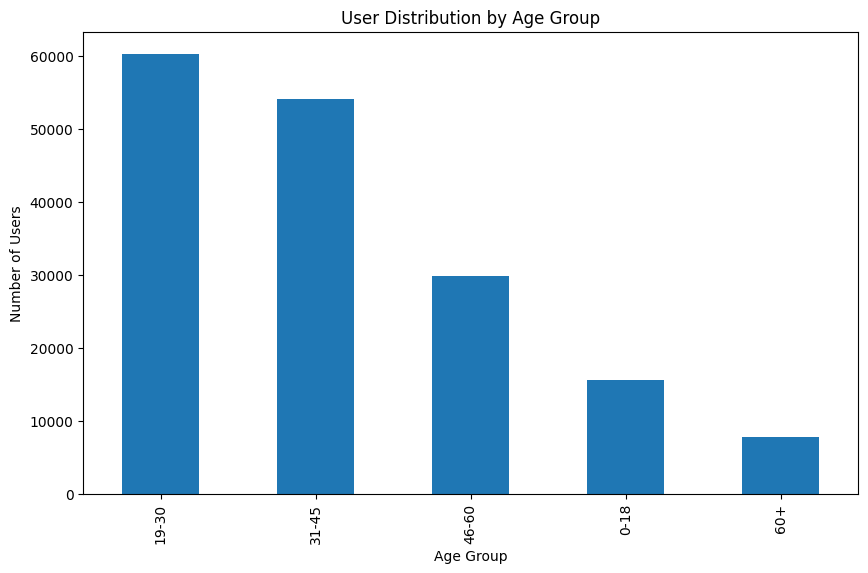

In [23]:
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
users['Age_Group'] = pd.cut(users['Age'], bins=age_bins, labels=age_labels)
users['Age_Group'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title("User Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

## EDA on Rating Dataframe

### Ratings Distribution

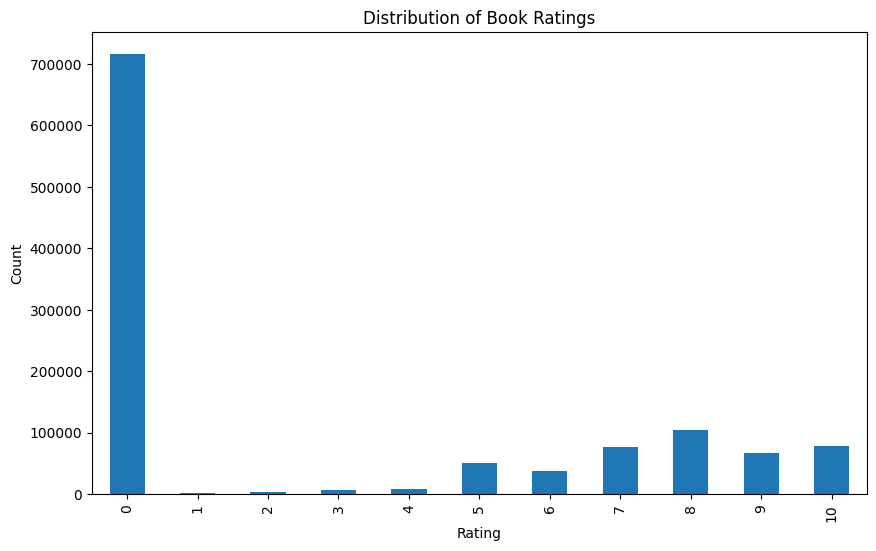

In [24]:
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Zero vs Non-Zero Ratings

In [25]:
zero_ratings = ratings[ratings['Book-Rating'] == 0].shape[0]
non_zero_ratings = ratings[ratings['Book-Rating'] != 0].shape[0]
print(f"Zero Ratings: {zero_ratings}, Non-Zero Ratings: {non_zero_ratings}")

Zero Ratings: 716109, Non-Zero Ratings: 433671


### Most Rated Books

In [26]:
most_rated_books = ratings['ISBN'].value_counts().head(10)
print(f"Most Rated Books:\n{most_rated_books}")

Most Rated Books:
ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: count, dtype: int64


### User Rating Behavior

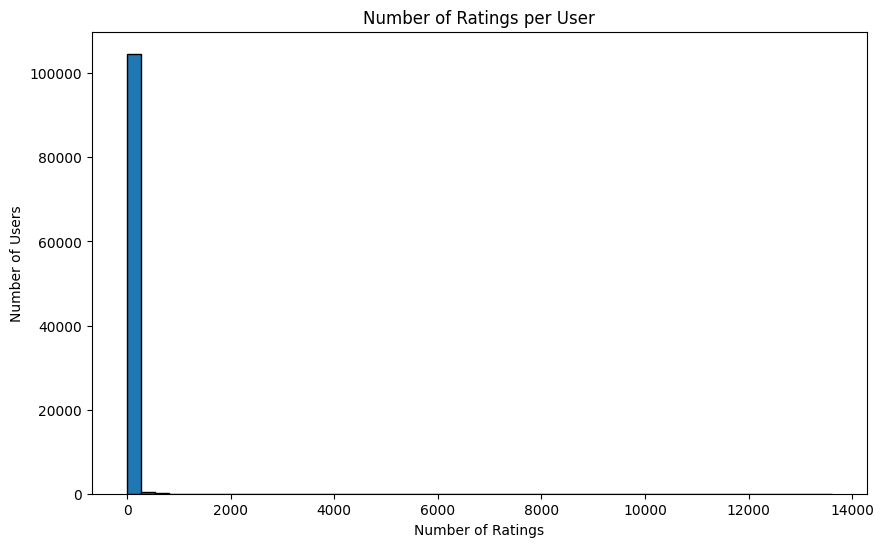

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming ratings is your DataFrame and 'User-ID' is the column of interest
ratings_per_user = ratings['User-ID'].value_counts()

# Plot the histogram using Matplotlib directly
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user, bins=50, edgecolor='k')
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()


### Top Users

In [28]:
top_users = ratings['User-ID'].value_counts().head(10)
print(f"Top Users by Number of Ratings:\n{top_users}")

Top Users by Number of Ratings:
User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64


### Sparsity Analysis

In [29]:
num_ratings = ratings.shape[0]
num_possible_ratings = ratings['User-ID'].nunique() * ratings['ISBN'].nunique()
sparsity = (1 - num_ratings / num_possible_ratings) * 100
print(f"Ratings Matrix Sparsity: {sparsity:.2f}%")

Ratings Matrix Sparsity: 100.00%


## Cross DataFrame EDA:

In [30]:
top_books_by_age = ratings.merge(users[['User-ID', 'Age_Group']], on='User-ID')
top_books_by_age_group = top_books_by_age.groupby(['Age_Group', 'ISBN']).size().unstack().fillna(0)
print(f"Top Books by Age Group:\n{top_books_by_age_group}")

Top Books by Age Group:
ISBN        0330299891   0375404120   0586045007   9022906116   9032803328  \
Age_Group                                                                    
0-18                 0            0            0            0            0   
19-30                0            0            0            0            0   
31-45                2            2            1            1            1   
46-60                0            0            0            0            0   
60+                  0            0            0            0            0   

ISBN        9044922564   9044922572   9044922718   9044923161   904492401X  \
Age_Group                                                                    
0-18                 0            0            0            0            0   
19-30                0            0            0            0            0   
31-45                1            1            1            1            1   
46-60                0            0    

### Rating Patterns by Location

In [31]:
ratings_with_location = ratings.merge(users[['User-ID', 'Location']], on='User-ID')
top_locations = ratings_with_location['Location'].value_counts().head(10)
print(f"Top Rating Locations:\n{top_locations}")

Top Rating Locations:
Location
toronto, ontario, canada           16431
n/a, n/a, n/a                      13623
ottawa, ontario, canada             9075
chicago, illinois, usa              8722
seattle, washington, usa            8541
olympia, washington, usa            8033
london, england, united kingdom     7979
omaha, nebraska, usa                7856
little canada, minnesota, usa       7552
st. louis, missouri, usa            7366
Name: count, dtype: int64


### Rating Trends Over Time

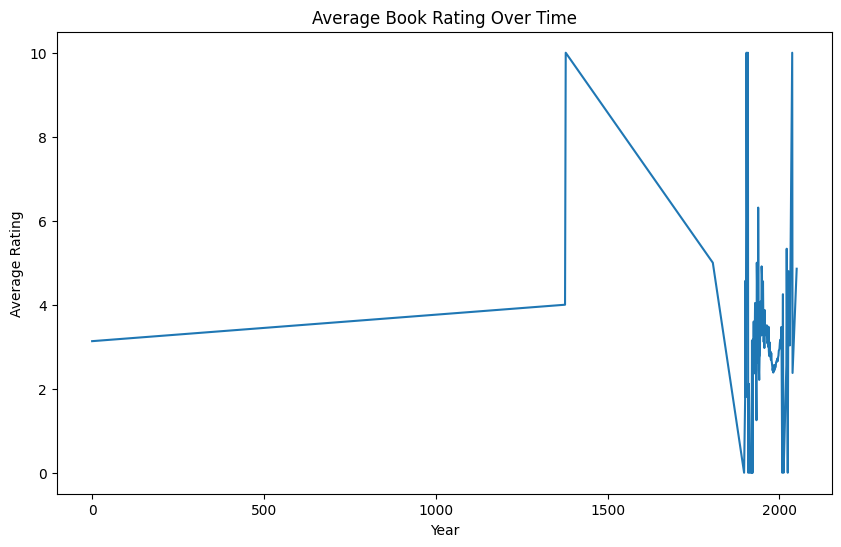

In [32]:
books_with_ratings = ratings.merge(books[['ISBN', 'Year-Of-Publication']], on='ISBN')
ratings_over_time = books_with_ratings.groupby('Year-Of-Publication')['Book-Rating'].mean()
ratings_over_time.plot(kind='line', figsize=(10, 6))
plt.title("Average Book Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

###  Books by Age Group

In [33]:
books_by_age_group = top_books_by_age.groupby('Age_Group')['ISBN'].value_counts().unstack().fillna(0)
print(f"Books Popular in Each Age Group:\n{books_by_age_group}")

Books Popular in Each Age Group:
ISBN        0330299891   0375404120   0586045007   9022906116   9032803328  \
Age_Group                                                                    
0-18                 0            0            0            0            0   
19-30                0            0            0            0            0   
31-45                2            2            1            1            1   
46-60                0            0            0            0            0   
60+                  0            0            0            0            0   

ISBN        9044922564   9044922572   9044922718   9044923161   904492401X  \
Age_Group                                                                    
0-18                 0            0            0            0            0   
19-30                0            0            0            0            0   
31-45                1            1            1            1            1   
46-60                0        

### Data Visualization

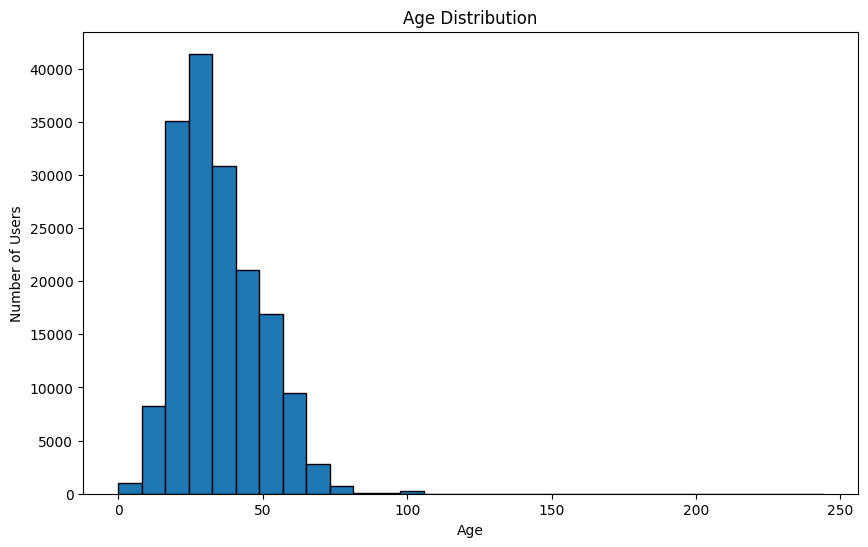

In [34]:
import matplotlib.pyplot as plt

# Assuming 'users' is your DataFrame and 'Age' is the column of interest
plt.figure(figsize=(10, 6))
plt.hist(users['Age'].dropna(), bins=30, edgecolor='k')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()


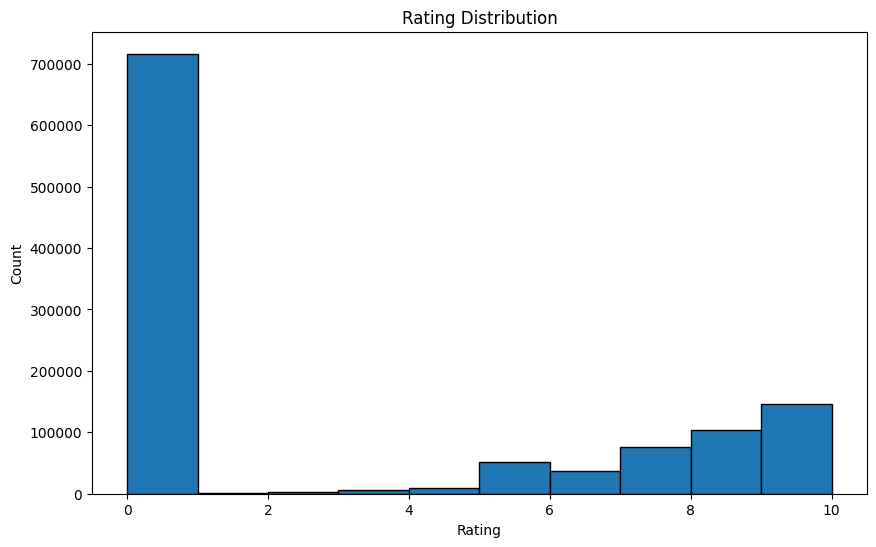

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(ratings['Book-Rating'].dropna(), bins=10, edgecolor='k')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


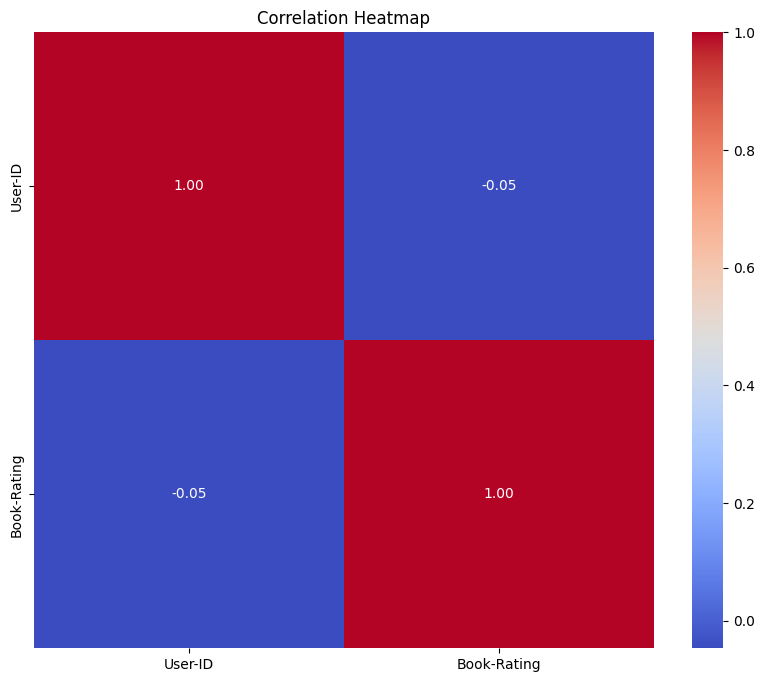

In [36]:


# Select only numeric columns for correlation computation
numeric_ratings = ratings.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_ratings.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


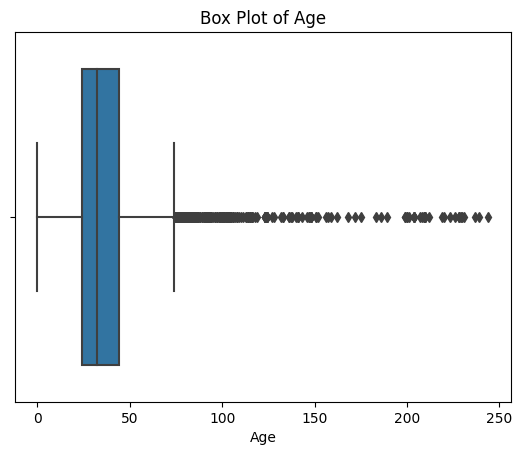

In [37]:
# Box Plots for Age and Year-Of-Publication
sns.boxplot(x=users['Age'])
plt.title("Box Plot of Age")
plt.show()

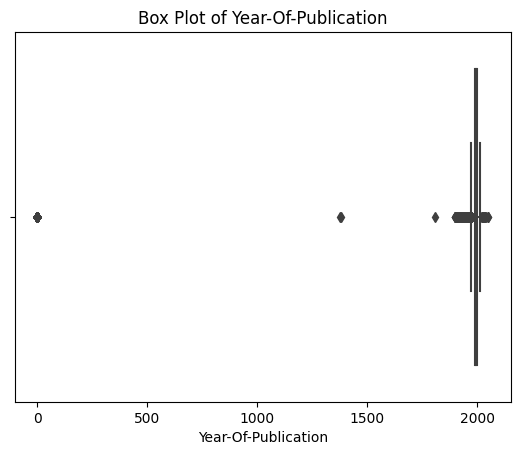

In [38]:
sns.boxplot(x=books['Year-Of-Publication'])
plt.title("Box Plot of Year-Of-Publication")
plt.show()


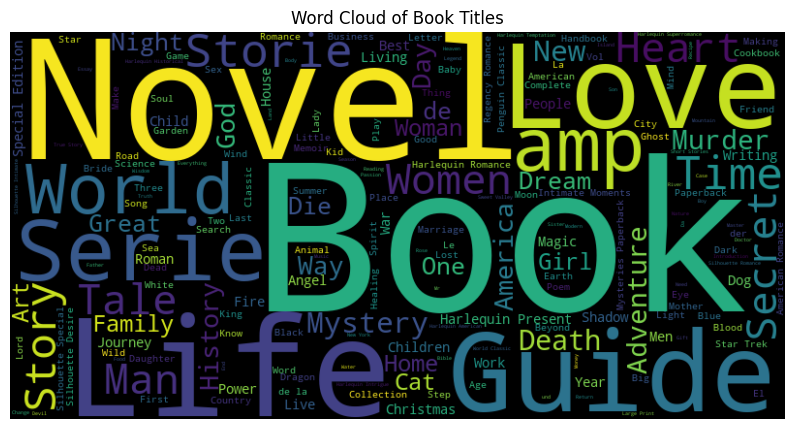

In [39]:
# Word Clouds for Popular Book Titles or Authors
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(books['Book-Title']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Book Titles")
plt.show()

### Pouplarity based Book Recomendation system

In [42]:
ratings_with_name=ratings.merge(books,on='ISBN')

In [46]:
num_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [52]:
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')
ratings_with_name = ratings_with_name.dropna(subset=['Book-Rating'])
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [53]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [54]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)


In [55]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [57]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [56]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

## Collaborative Filtering Based Recommender System

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [59]:
active_users = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
educated_users = active_users[active_users].index
filtered_ratings = ratings_with_name[ratings_with_name['User-ID'].isin(educated_users)]

In [60]:
popular_books = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
notable_books = popular_books[popular_books].index
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(notable_books)]

In [65]:
pivot_table = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pivot_table.fillna(0, inplace=True)
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
similarity_matrix = cosine_similarity(pivot_table)
similarity_matrix.shape

(706, 706)

In [63]:
# Step 4: Define recommendation function
def recommend(book_title):
    # Find index of the book
    index = np.where(pivot_table.index == book_title)[0][0]
    similar_items = sorted(list(enumerate(similarity_matrix[index])), key=lambda x: x[1], reverse=True)[1:5]
    
    recommendations = []
    for item in similar_items:
        book_index = item[0]
        book_data = books[books['Book-Title'] == pivot_table.index[book_index]]
        recommendations.append([
            book_data['Book-Title'].values[0],
            book_data['Book-Author'].values[0],
            book_data['Image-URL-M'].values[0]
        ])
    
    return recommendations

In [64]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [66]:
# Step 5: Save data to pickle files
pickle.dump(filtered_ratings, open('popular.pkl', 'wb'))
books.drop_duplicates('Book-Title', inplace=True)
pickle.dump(pivot_table, open('pt.pkl', 'wb'))
pickle.dump(books, open('books.pkl', 'wb'))
pickle.dump(similarity_matrix, open('similarity_scores.pkl', 'wb'))